# Python de cero a experto
**Autor:** Luis Miguel de la Cruz Salas

<a href="https://github.com/luiggix/Python_cero_a_experto">Python de cero a experto</a> by Luis M. de la Cruz Salas is licensed under <a href="https://creativecommons.org/licenses/by-nc-nd/4.0?ref=chooser-v1">Attribution-NonCommercial-NoDerivatives 4.0 International</a>


**Objetivos.**

## Transferencia de calor

**Jean-Baptiste Joseph Fourier**
fue un matemático y físico francés que ejerció una fuerte influencia a través de su trabajo *Théorie analytique de la chaleur*. En este trabajo mostró que es posible analizar la conducción de calor en cuerpos sólidos en términos de series matemáticas infinitas, las cuales ahora llevan su nombre: *Series de Fourier*. Fourier comenzó su trabajo en 1807, en Grenoble, y lo completó en París en 1822. Su trabajo le permitió expresar la conducción de calor en objetos bidimensionales (hojas muy delgadas de algún material) en términos de una ecuación diferencial:


$$
\dfrac{\partial u}{ \partial t} = \kappa \left(\dfrac{\partial^2 u}{ \partial x^2} + \dfrac{\partial^2 u}{ \partial y^2}\right)
$$

donde $u$ representa la temperatura en un instante de tiempo $t$ y en un punto $(x,y)$ del plano Cartesiano y $\kappa$ es la conductividad del material. Además estableción una ley para el flujo de calor que se escribe como:

$$
\vec{q} = -\kappa \nabla u = -\kappa \left(\dfrac{\partial u}{\partial x}, \dfrac{\partial u}{\partial y}\right)
$$

Vamos a realizar una ejemplo de conducción de calor usando estas ecuaciones, pero para ello necesitamos conocer las herramientas de <a href="./T14_Numpy.ipynb">numpy</a> y de <a href="./T15_Matplotlib.ipynb">matplotlib</a>.

### Ejemplo 1.
<div>
 <img src="./Figuras/malla2D_DF.png"  hspace="5" vspace="5" style="float: right;"/>
Calculemos la transferencia de calor por conducción en una placa cuadrada unitaria usando el método de diferencias finitas. El problema se describe de la siguiente manera:
$$
\dfrac{\partial u}{ \partial t} = \kappa \left(\dfrac{\partial^2 u}{ \partial x^2} + \dfrac{\partial^2 u}{ \partial y^2}\right)
$$
$$
\begin{eqnarray}
\hline
u(x,y,t=0) & = & 0 \qquad \text{Condición inicial}\\
\hline
u(0,y,t) & = & 20 \qquad \text{Condiciones}\\
u(1,y,t) & = & 5 \qquad \qquad \text{de}\\
u(x,0,t) & = & 50 \qquad \text{frontera}\\
u(x,1,t) & = & 8 \\
\hline
\end{eqnarray}
$$ 
 </div>

**<font color="#126534">SOLUCIÓN.</font>**<br>

Los pasos a seguir son los siguientes.

1. Definir el dominio usando un arreglo de Numpy:

In [ ]:
import numpy as np

In [55]:
Lx = 1  # Longitud horizontal
Ly = 1  # Longitud vertical
Nx = 18 # Puntos donde se hará el cálculo
Ny = 18 # en las direcciones horizontal y vertical

x = np.linspace(0,Lx,Nx+2)
y = np.linspace(0,Ly,Ny+2)
print(x)
print(y)

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]


In [56]:
xg, yg = np.meshgrid(x,y) # creamos la rejilla para usarla en Matplotlib
print(xg)
print(yg)

[[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
  0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
  0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
  0.94736842 1.        ]
 [0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
  0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
  0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
  0.94736842 1.        ]
 [0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
  0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
  0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
  0.94736842 1.        ]
 [0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
  0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
  0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
  0.94736842 1.        ]
 [0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
  0.31578947 0.3

In [57]:
import matplotlib.pyplot as plt

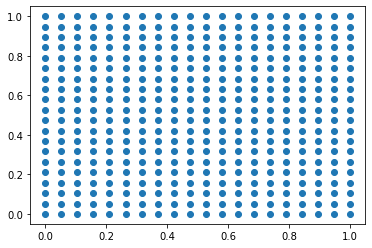

In [58]:
plt.scatter(xg, yg) # Graficamos la rejilla

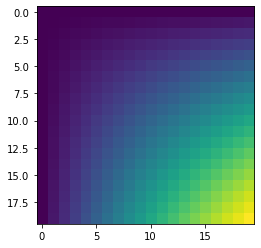

In [59]:
z = np.sin(xg * yg)

plt.imshow(z)

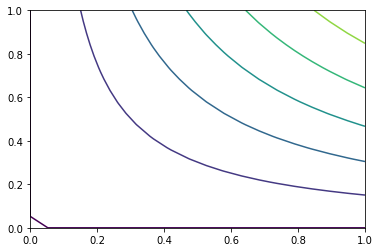

In [60]:
plt.contour(xg,yg,z)

2. Escribir la aproximación en diferencias finitas de la ecuación diferencial:

$$
u_{i,j}^{n+1} = u_{i,j}^n + \dfrac{h_t^2\kappa}{h^2} 
\left(u_{i+1,j}^n + u_{i-1,j}^n + u_{i,j+1}^n + u_{i,j-1}^n - 4u_{i,j}^n\right) 
$$

<img src="./Figuras/malla2D_DF.png"  style="width: 300px;"/>

donde:
- $u_{i,j} = u(x_i, y_j), u_{i+1,j} = u(x_{i+1}, y_j), u_{i-1,j} = u(x_{i-1}, y_j), u_{i,j+1} = u(x_i, y_{j+1}), u_{i,j-1} = u(x_i, y_{j-1})$. 
- El superíndice indica el instante de tiempo, entonces el instante actual es $n = t$ y el instante siguiente es $n+1 = t + h_t$, con $h_t$ el paso de tiempo.
- En este ejemplo $h_x = h_y$.

3. Definir todos los parámetros necesarios para el cálculo: 
- la $\kappa$, 
- el arreglo $u$ para almacenar la solución, 
- la $h$ y 
- el $\Delta t$

In [65]:
k = 1.0
h = Lx / (Nx+1)
print(h)
ht = 0.0001
print(ht)
N = (Nx + 2) * (Ny + 2)
print(N)
u = np.zeros(N).reshape(Nx+2, Ny+2)
print(u)

0.05263157894736842
0.0001
400
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0

4. Definir las condiciones iniciales y de frontera:
$$
\begin{eqnarray}
\hline
u(x,y,t=0) & = & 0 \qquad \text{Condición inicial}\\
\hline
u(0,y,t) & = & 20 \qquad \text{Condiciones}\\
u(1,y,t) & = & 5 \qquad \qquad \text{de}\\
u(x,0,t) & = & 50 \qquad \text{frontera}\\
u(x,1,t) & = & 8 \\
\hline
\end{eqnarray}
$$

In [66]:
u[0,:] = 20
u[Nx+1,:] = 5
u[:,0] = 50
u[:,Ny+1] = 8
print(u)

[[50. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.
  20.  8.]
 [50.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  8.]
 [50.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  8.]
 [50.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  8.]
 [50.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  8.]
 [50.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  8.]
 [50.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  8.]
 [50.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  8.]
 [50.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  8.]
 [50.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  8.]
 [50.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  8.]
 [50.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.

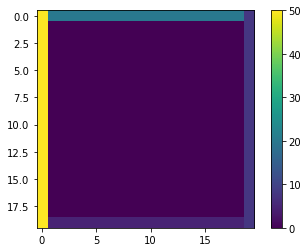

In [67]:
f = plt.imshow(u)
plt.colorbar(f)

4. Implementar el algoritmo de solución
$$
u_{i,j}^{n+1} = u_{i,j}^n + \dfrac{\kappa}{h^2} 
\left(u_{i+1,j}^n + u_{i-1,j}^n + u_{i,j+1}^n + u_{i,j-1}^n - 4u_{i,j}^n\right) 
$$


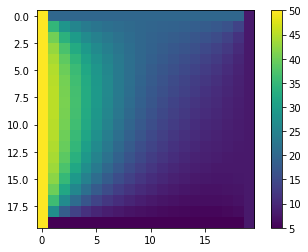

In [69]:
Tmax = 1000
r = k * ht / h**2
u_new = u.copy()
for t in range(Tmax+1):
    for i in range(1,Nx+1):
        for j in range(1,Ny+1):
            u_new[i,j] = u[i,j] + r * (u[i+1,j] + u[i-1,j] + u[i,j+1] + u[i,j-1] - 4*u[i,j])
    u[:] = u_new[:]

f = plt.imshow(u)
plt.colorbar(f)

### Ejemplo 2.
Usando la información calculada antes, vamos a calcular el flujo de calor:

$$
\vec{q} = -\kappa \nabla u = -\kappa \left(\dfrac{\partial u}{\partial x}, \dfrac{\partial u}{\partial y}\right)
$$

**<font color="#126534">SOLUCIÓN.</font>**<br>

Los pasos son los siguientes:

1. Escribir la fórmula en diferencias del flujo de calor:

$$
\vec{q}_{i,j} = (qx_{i,j}, qy_{i,j}) = \dfrac{\kappa}{2h} (u_{i+1,j}-u_{i-1,j}, u_{i,j+1}-u_{i,j-1} )
$$

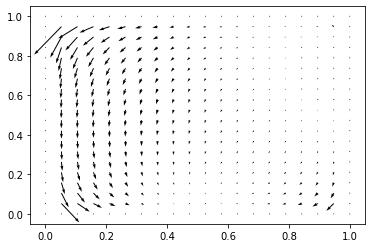

In [72]:
qx = np.zeros(N).reshape(Nx+2, Ny+2)
qy = qx.copy()

s = k / 2*h
for i in range(1,Nx+1):
    for j in range(1,Ny+1):
        qx[i,j] = s * (u[i+1,j] - u[i-1,j])
        qy[i,j] = s * (u[i,j+1] - u[i,j-1])

plt.quiver(xg, yg, qx, qy, scale=10, zorder=10)


## Seguimiento de partículas

Si soltamos una partícula en un flujo, dicha partícula seguirá la dirección del flujo y delineará  una trayectoria como se muestra en la siguiente figura.

<img src="./Figuras/Vectorial.png"  style="width: 300px;"/>

En lo que sigue vamos a construir un campo vectorial a partir de la solución de una ecuación diferencial parcial y posteriormente generaremos varias trayectorias siguiendo partículas dentro del flujo. Para ello haremos uso de las herramientas de Numpy y Sympy.


## Ejemplo 1. Flujo de calor

El flujo de calor en una 
q_x^{\prime\prime} = -\kappa \frac{d T}{d x}

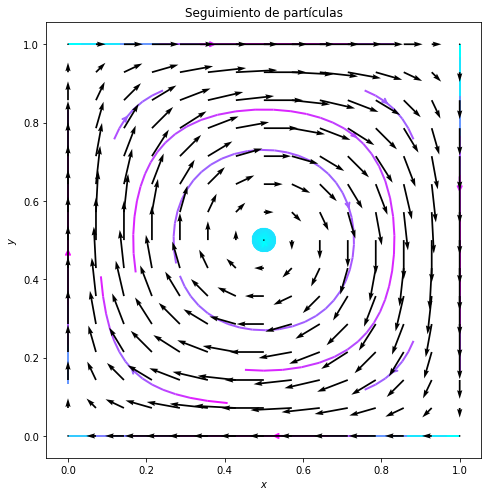

In [1]:
import numpy as np
import matplotlib.pyplot as plt

lx, ly = 1, 1
nx, ny = 15, 15

xg, yg =np.meshgrid(np.linspace(0,lx,nx),np.linspace(0,ly,ny))
A = 1.0
alpha = 1.0
u = -A * np.cos(np.pi * alpha * yg) * np.sin(np.pi * alpha * xg)
v =  A * np.sin(np.pi * alpha * yg) * np.cos(np.pi * alpha * xg)

fig = plt.figure(figsize=(7,7))
plt.gca().set_aspect('equal')
plt.quiver(xg, yg, u, v, scale=10, zorder=10)
plt.streamplot(xg, yg, u, v, linewidth=2.0, color=np.hypot(u, v),
               cmap='cool', density=0.25, arrowstyle='->', arrowsize=1.0)
plt.title('Seguimiento de partículas')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.tight_layout()
#plt.savefig('Vectorial.png')
plt.show()